#### Imports

In [1]:
from Bateman_PINN import *
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

Running on  cpu


### Test of _BatemanPINN_ for 2 isotopes

Here we are going to test the class _BatemanPINN_ checking: 
* auto-stop in the training
* plot the loss function
* compare with the analytical solution

In [32]:
#parameters for the PINN
lamda = [200,3]
lamda_matrix = get_lamda_matrix(lamda, n_isotopes=2)
n_hidden_layers = 1
neurons = 2#50

#parameters for the training
t_max = 2.5
t_steps = 10000
weights = [50, 1]       # loss weights [IC_loss, ODE_loss]

#### Test the auto-stop

In [3]:
#create the PINN
PINN = BatemanPINN(lamda_matrix, n_hidden_layers, neurons)
PINN.xavier()
#train the PINN
training_output = train(PINN, t_max, t_steps, weights=weights, auto_stop=True, abstol=1e-5, patience=10, normalize_data=False, verbose=False)  # type: ignore
print('INFO ON THE TRAINING:\n')
print('\t', 'Training flag:\t\t', training_output[2])
print('\t', 'Number of epochs done:\t', training_output[1], '\n')
#evaluate the population with the PINN
PINN.eval() #prepare the PINN to evaluate
t_eval = torch.linspace(0, t_max, t_steps, requires_grad=True, device=DEVICE).reshape(-1,1)    #reshape it to a tensor [1, t_steps]
N_t = PINN(t_eval)

#save the predictions on np array
N1_t = N_t[:, 0].cpu().detach().numpy()
N2_t = N_t[:, 1].cpu().detach().numpy()
t_draw = t_eval[:,0].cpu().detach().numpy()

INFO ON THE TRAINING:

	 Training flag:		 auto_stop
	 Number of epochs done:	 19 



#### Plot the loss function

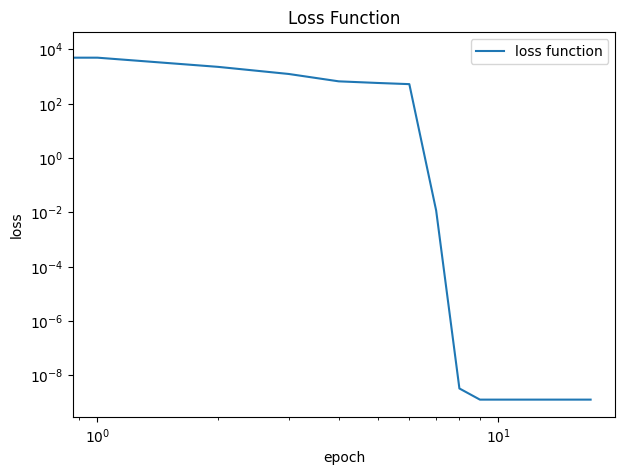

In [4]:
plt.figure(figsize=(7,5)) 
plt.loglog(range(len(training_output[0])), training_output[0], label='loss function')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title(r'Loss Function')
plt.legend()
plt.show()

In [5]:
from torchsummary import summary
summary(PINN)

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            2
├─ModuleList: 1-2                        --
├─Linear: 1-3                            4
Total params: 6
Trainable params: 6
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            2
├─ModuleList: 1-2                        --
├─Linear: 1-3                            4
Total params: 6
Trainable params: 6
Non-trainable params: 0

#### Conpare with the analytical solution

In [11]:
N1_analy_t = []
N2_analy_t = []

# for t_i in t_draw:
#     N1_ti, N2_ti = get_AnalyticalSolution(PINN.lamda.cpu(), PINN.initial.cpu(), t_i)
#     N1_analy_t.append(N1_ti)
#     N2_analy_t.append(N2_ti)

Ns = get_AnalyticalSolution_CRAM(PINN.lamda_matrix.cpu().numpy(), PINN.initial.cpu().numpy(), t_draw).T
N1_analy_t, N2_analy_t = Ns

/Users/mihapompe/miniforge3/envs/PINN/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Draw the two different solutions to confront them

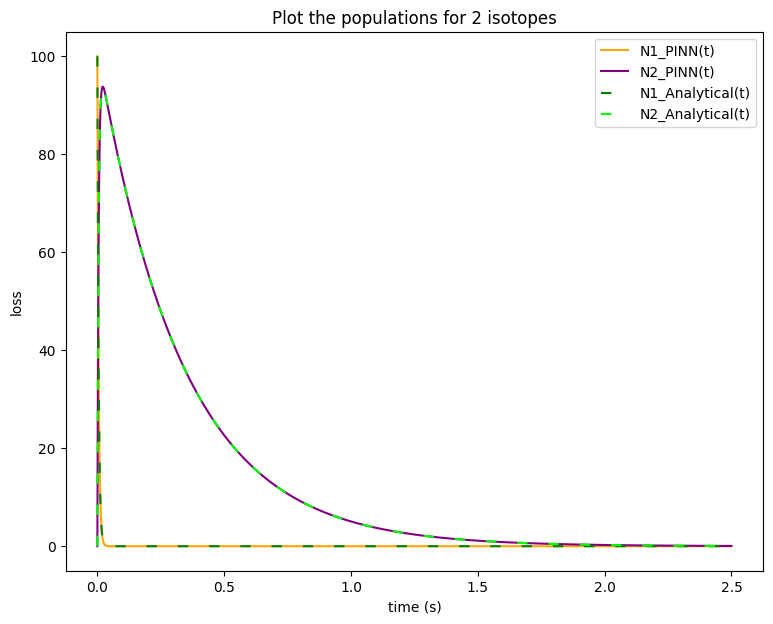

In [14]:
plt.figure(figsize=(9,7)) 
plt.plot(t_draw, N1_t, label='N1_PINN(t)', color='orange')
plt.plot(t_draw, N2_t, label='N2_PINN(t)', color='purple')

plt.plot(t_draw, N1_analy_t, label='N1_Analytical(t)', color='green', linestyle='--', dashes=(5, 10))
plt.plot(t_draw, N2_analy_t, label='N2_Analytical(t)', color='lime', linestyle='--', dashes=(5, 10))

plt.xlabel('time (s)')
plt.ylabel('loss')
plt.title('Plot the populations for 2 isotopes')
plt.legend()
plt.show()

### Test of _BatemanPINN_ for 3 isotopes

In [33]:
#parameters for the PINN
lamda = [62,3,0]
lamda_matrix = get_lamda_matrix(lamda, n_isotopes=3)
n_hidden_layers = 1
neurons = 50

#parameters for the training
t_max = 3.5
t_steps = 1000
weights = [50,1]

print('lambda_matrix:\n', lamda_matrix)

lambda_matrix:
 [[-62   0   0]
 [ 62  -3   0]
 [  0   3   0]]


In [ ]:
#create the PINN
PINN = BatemanPINN(lamda_matrix, n_hidden_layers, neurons, initial=[100.,0,0])
PINN.xavier()

#train the PINN
loss, epochs_done, flag = train(PINN, t_max, t_steps, weights=weights, auto_stop=True, abstol=1e-7, patience=10, normalize_data=False, verbose=False)  # type: ignore

'''
print('INFO ON THE TRAINING:\n')
print('\t', 'Training flag:\t\t', flag)
print('\t', 'Number of epochs done:\t', epochs_done, '\n')
'''

#evaluate the population with the PINN
PINN.eval() #prepare the PINN to evaluate
t_eval = torch.linspace(0, t_max, t_steps, requires_grad=True, device=DEVICE).reshape(-1,1)    #reshape it to a tensor [1, t_steps]
N_t = PINN(t_eval)

#save the predictions on np array
N1_t = N_t[:, 0].cpu().detach().numpy()
N2_t = N_t[:, 1].cpu().detach().numpy()
N3_t = N_t[:, 2].cpu().detach().numpy()
t_draw = t_eval[:,0].cpu().detach().numpy()

#anlaytical solution
N1_analy_t = []
N2_analy_t = []
N3_analy_t = []

for t_i in t_draw:
    N_analy = get_AnalyticalSolution(PINN.lamda.cpu().detach().numpy(), PINN.initial.cpu().detach().numpy(), t_i)

    N1_analy_t.append(N_analy[0])
    N2_analy_t.append(N_analy[1])
    N3_analy_t.append(N_analy[2])

In [ ]:
print("I've done: ", epochs_done, " epochs\n\n")
plt.figure(figsize=(7,5)) 
plt.plot(range(len(loss)), loss, label='loss function')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title(r'Loss Function')
plt.legend()
plt.show()

Plot the polutations

In [ ]:
plt.figure(figsize=(9,7)) 
plt.plot(t_draw, N1_t, label='N1_PINN(t)', color='orange')
plt.plot(t_draw, N2_t, label='N2_PINN(t)', color='purple')
plt.plot(t_draw, N3_t, label='N3_PINN(t)', color='blue')

plt.plot(t_draw, N1_analy_t, label='N1_Analytical(t)', color='green', linestyle='--', dashes=(5, 10))
plt.plot(t_draw, N2_analy_t, label='N2_Analytical(t)', color='lime', linestyle='--', dashes=(5, 10))
plt.plot(t_draw, N3_analy_t, label='N3_Analytical(t)', color='aqua', linestyle='--', dashes=(5, 10))

plt.xlabel('time (s)')
plt.ylabel('Population')
plt.title(f'Decay of 3 isotopes')
plt.text(4, 4, f'lamdba: {lamda}\nlayer: {n_hidden_layers}\nneurons: {neurons}\nt_steps: {t_steps}\nweights: {weights}')
plt.legend()
plt.show()

### Test of the method for bigger matrics

In [37]:
PATH = "/Users/mihapompe/Documents/Software/PINNs/miha-semester/data/A_matrices/"
five = "Pu241_decay_n=5.npz"
twelve = "Th232_decay_n=12.npz"
seventeen = "Rn222_decay_n=17.npz"
big = "endfb68.npz"
big2 = "endfb71.npz"
big3 = "jeff311.npz"

from scipy.sparse import load_npz, dia_array
lamda_matrix = load_npz(PATH+big).toarray()

Text(0.5, 1.0, 'Eigenspactrum')

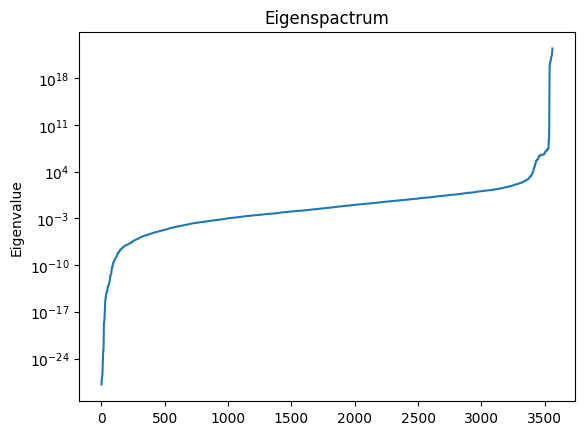

In [36]:
lam = np.linalg.eig(lamda_matrix)[0]
idx = lam.argsort()[::-1]   
lam = lam[idx]
lam = lam[lam < 0]
plt.plot(-lam)
plt.yscale("log")
plt.ylabel("Eigenvalue")
plt.title("Eigenspactrum")

In [38]:
lamda_matrix.shape

(1624, 1624)

In [39]:
np.sum(lamda_matrix != 0)

2525

In [50]:
import torch
a = torch.tensor(lamda_matrix)
b = a.to_sparse()
c = torch.tensor(np.ones((1624, 1)))
print(b.shape)
print(c.shape)
torch.sparse.mm(b, c)

torch.Size([1624, 1624])
torch.Size([1624, 1])


tensor([[2.5811e-10],
        [0.0000e+00],
        [0.0000e+00],
        ...,
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00]], dtype=torch.float64)

/var/folders/vd/1s5tjyzd0b53qpf4dc5m7ttm0000gn/T/ipykernel_36641/791552292.py:1: RuntimeWarning: divide by zero encountered in log
  plt.matshow(np.log(lamda_matrix))
/var/folders/vd/1s5tjyzd0b53qpf4dc5m7ttm0000gn/T/ipykernel_36641/791552292.py:1: RuntimeWarning: invalid value encountered in log
  plt.matshow(np.log(lamda_matrix))


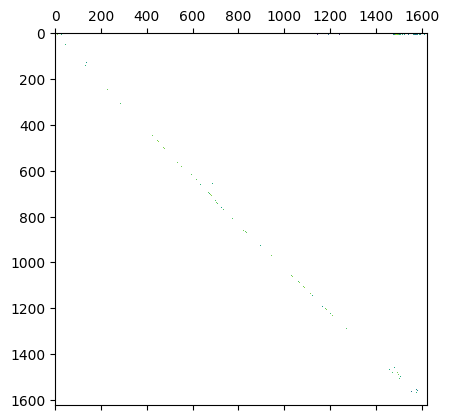

In [13]:
plt.matshow(np.log(lamda_matrix))

Remove all the columns and rows where the diagonal value is zero.

In [3]:
dia = np.diag(lamda_matrix)
n = len(dia)
for i in range(n-1, -1, -1):
    if dia[i] == 0:
        lamda_matrix = np.delete(lamda_matrix, i, 0)
        lamda_matrix = np.delete(lamda_matrix, i, 1)

In [4]:
lam = np.linalg.eig(lamda_matrix)[0]
idx = lam.argsort()[::-1]   
lam = lam[idx]
lam = lam[lam < 0]
print(lam)
stiffness = lam[-1]/lam[0]
stiffness

[-2.25538134e-18 -5.51097179e-09 -1.65732680e-08 -3.16231532e-06
 -2.61069340e-05 -4.51671183e-05 -2.75254611e-04 -5.45911126e-03
 -1.79856115e-02 -6.89655172e+00 -3.34448161e+06]


1.4828896321070234e+24

In [5]:
n_hidden_layers = 1
lamda_num = lamda_matrix.shape[0]
neurons = lamda_num

#parameters for the training
t_max = 3.5
t_steps = 1000
weights = [50000000,1]
initial = np.zeros(lamda_num)
initial[0] = 100

#create the PINN
PINN = BatemanPINN(lamda_matrix, n_hidden_layers, neurons, initial=initial)
PINN.xavier()

#train the PINN
loss, epochs_done, flag = train(PINN, t_max, t_steps, weights=weights, auto_stop=True, abstol=1e-7, patience=10, normalize_data=False, verbose=False)  # type: ignore

'''
print('INFO ON THE TRAINING:\n')
print('\t', 'Training flag:\t\t', flag)
print('\t', 'Number of epochs done:\t', epochs_done, '\n')
'''

print(loss[-1])

#evaluate the population with the PINN
PINN.eval() #prepare the PINN to evaluate
t_eval = torch.linspace(0, t_max, t_steps, requires_grad=True, device=DEVICE).reshape(-1,1)    #reshape it to a tensor [1, t_steps]
N_t = PINN(t_eval)
t_draw = t_eval[:,0].cpu().detach().numpy()

tensor([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])


RuntimeError: expected scalar type Float but found Double

In [39]:
Ns = get_AnalyticalSolution_CRAM(PINN.lamda_matrix.cpu().numpy(), PINN.initial.cpu().numpy(), t_draw).T

/Users/mihapompe/miniforge3/envs/PINN/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


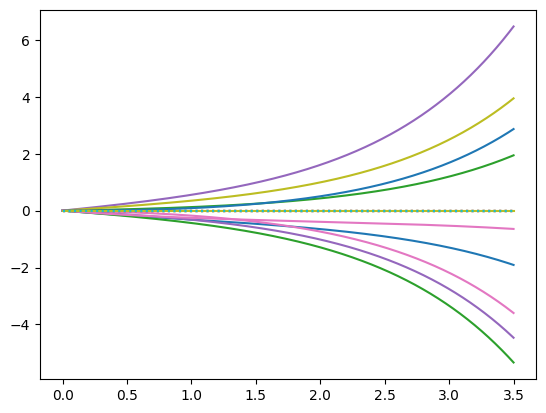

In [40]:
for i in range(lamda_num):
    N_i = N_t[:, i].cpu().detach().numpy()
    if i != 0:
        plt.plot(t_draw, N_i)
        plt.plot(t_draw, Ns[i], ":")

### Test of the method _"normalization"_ for 2 isotopes

Here we are going to test the method _normalization_ using the same parameters of the first test: "_BatemanPINN_ for 2 isotopes".


What is interesting is that now with the same initial parameters the NN needs almost 3 times more epochs.

In [ ]:
#parameters for the PINN
lamda = [5,3]
lamda_matrix = np.array([[-lamda[0],0],[lamda[0],-lamda[1]]])
n_hidden_layers = 1
neurons = 50

#parameters for the training
t_max = 2.5
t_steps = 100
weights = [1,1]

#create the PINN
PINN = BatemanPINN(lamda_matrix, n_hidden_layers, neurons)
PINN.xavier()

#train the PINN
loss, epochs_done, flag = train(PINN, t_max, t_steps, weights=weights, auto_stop=True, abstol=1e-5, patience=10, normalize_data=True, verbose=False)  # type: ignore
print('INFO ON THE TRAINING:\n')
print('\t', 'Training flag:\t\t', flag)
print('\t', 'Number of epochs done:\t', epochs_done, '\n')

#evaluate the population with the PINN
PINN.eval()
t_eval = torch.linspace(0, t_max, t_steps, requires_grad=True, device=DEVICE).reshape(-1,1)   
t_norm = PINN.normalize(t_eval)

N_t = PINN(t_norm)
# PINN.normalize_restore(t_eval)

N1_t = N_t[:, 0].cpu().detach().numpy()
N2_t = N_t[:, 1].cpu().detach().numpy()

t_draw = t_norm[:,0].cpu().detach().numpy()

#analytical soluton
N1_analy_t = []
N2_analy_t = []
lamda_norm = torch.abs(torch.diag(PINN.lamda_matrix)).detach()

for t_i in t_draw:
    N1_ti, N2_ti = get_AnalyticalSolution(lamda_norm.cpu(), PINN.initial.cpu(), t_i)
    N1_analy_t.append(N1_ti)
    N2_analy_t.append(N2_ti)

plt.figure(figsize=(9,7)) 
plt.plot(t_draw, N1_t, label='N1_PINN(t)', color='orange')
plt.plot(t_draw, N2_t, label='N2_PINN(t)', color='purple')

plt.plot(t_draw, N1_analy_t, label='N1_Analytical(t)', color='green', linestyle='--', dashes=(5, 10))
plt.plot(t_draw, N2_analy_t, label='N2_Analytical(t)', color='lime', linestyle='--', dashes=(5, 10))

plt.xlabel('normalized time')
plt.ylabel('loss')
plt.title('Plot the populations with the normalized inputs')
plt.legend()
plt.show()

### Test for stochastic gradient descent

In [ ]:
#parameters for the PINN
lamda = [5,3,0]
lamda_matrix = get_lamda_matrix(lamda, n_isotopes=3)
n_hidden_layers = 1
neurons = 50
batch_size = 1

#parameters for the training
t_max = 3.5
t_steps = 1000
weights = [1,1]

In [ ]:
#create the PINN
PINN = BatemanPINN(lamda_matrix, n_hidden_layers, neurons, initial=[100.,0,0])
PINN.xavier()

#train the PINN
loss, epochs_done, flag = train(PINN, t_max, t_steps, epochs=200, weights=weights, auto_stop=False, max_epoch=500, abstol=1e-5, patience=1, batch_size=batch_size, normalize_data=False, verbose=False)  # type: ignore

'''
print('INFO ON THE TRAINING:\n')
print('\t', 'Training flag:\t\t', flag)
print('\t', 'Number of epochs done:\t', epochs_done, '\n')
'''

#evaluate the population with the PINN
PINN.eval() #prepare the PINN to evaluate
t_eval = torch.linspace(0, t_max, t_steps, requires_grad=True, device=DEVICE).reshape(-1,1)    #reshape it to a tensor [1, t_steps]
N_t = PINN(t_eval)

#save the predictions on np array
N1_t = N_t[:, 0].cpu().detach().numpy()
N2_t = N_t[:, 1].cpu().detach().numpy()
N3_t = N_t[:, 2].cpu().detach().numpy()
t_draw = t_eval[:,0].cpu().detach().numpy()

#anlaytical solution
N1_analy_t = []
N2_analy_t = []
N3_analy_t = []

for t_i in t_draw:
    N_analy = get_AnalyticalSolution(PINN.lamda.cpu().detach().numpy(), PINN.initial.cpu().detach().numpy(), t_i)

    N1_analy_t.append(N_analy[0])
    N2_analy_t.append(N_analy[1])
    N3_analy_t.append(N_analy[2])

In [ ]:
loss

In [ ]:
print("I've done: ", epochs_done, " epochs\n\n")
plt.figure(figsize=(7,5)) 
plt.plot(range(len(loss)), loss, label='loss function')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title(r'Loss Function')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(9,7)) 
plt.plot(t_draw, N1_t, label='N1_PINN(t)', color='orange')
plt.plot(t_draw, N2_t, label='N2_PINN(t)', color='purple')
plt.plot(t_draw, N3_t, label='N3_PINN(t)', color='blue')

plt.plot(t_draw, N1_analy_t, label='N1_Analytical(t)', color='green', linestyle='--', dashes=(5, 10))
plt.plot(t_draw, N2_analy_t, label='N2_Analytical(t)', color='lime', linestyle='--', dashes=(5, 10))
plt.plot(t_draw, N3_analy_t, label='N3_Analytical(t)', color='aqua', linestyle='--', dashes=(5, 10))

plt.xlabel('time (s)')
plt.ylabel('Population')
plt.title(f'Plot the pupulations for 3 isotopes')
plt.text(4, 4, f'lamdba: {lamda}\nlayer: {n_hidden_layers}\nneurons: {neurons}\nt_steps: {t_steps}\nweights: {weights}')
plt.legend()
plt.show()

### Supervised learning

In [ ]:
#parameters for the PINN
lamda = [1000,1,0]
lamda_matrix = get_lamda_matrix(lamda, n_isotopes=3)
n_hidden_layers = 1
neurons = 500

#parameters for the training
t_max = 3.5
t_steps = 10000
weights = [1,1]

In [ ]:
#create the PINN
PINN = BatemanPINN(lamda_matrix, n_hidden_layers, neurons, initial=[100.,0,0])
PINN.xavier()

#train the PINN
loss, epochs_done, flag = train_Supervised(PINN, t_max, t_steps, weights=weights, auto_stop=True, abstol=1e-7, patience=10, normalize_data=False, verbose=False)  # type: ignore

'''
print('INFO ON THE TRAINING:\n')
print('\t', 'Training flag:\t\t', flag)
print('\t', 'Number of epochs done:\t', epochs_done, '\n')
'''

#evaluate the population with the PINN
PINN.eval() #prepare the PINN to evaluate
t_eval = torch.linspace(0, t_max, t_steps, requires_grad=True, device=DEVICE).reshape(-1,1)    #reshape it to a tensor [1, t_steps]
N_t = PINN(t_eval)

#save the predictions on np array
N1_t = N_t[:, 0].cpu().detach().numpy()
N2_t = N_t[:, 1].cpu().detach().numpy()
N3_t = N_t[:, 2].cpu().detach().numpy()
t_draw = t_eval[:,0].cpu().detach().numpy()
#anlaytical solution
N1_analy_t = []
N2_analy_t = []
N3_analy_t = []

for t_i in t_draw:
    N_analy = get_AnalyticalSolution(PINN.lamda.cpu().detach().numpy(), PINN.initial.cpu().detach().numpy(), t_i)

    N1_analy_t.append(N_analy[0])
    N2_analy_t.append(N_analy[1])
    N3_analy_t.append(N_analy[2])

In [ ]:
print("I've done: ", epochs_done, " epochs\n\n")
plt.figure(figsize=(7,5)) 
plt.plot(range(len(loss)), loss, label='loss function')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title(r'Loss Function')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(9,7)) 
plt.plot(t_draw, N1_t, label='N1_PINN(t)', color='orange')
plt.plot(t_draw, N2_t, label='N2_PINN(t)', color='purple')
plt.plot(t_draw, N3_t, label='N3_PINN(t)', color='blue')

plt.plot(t_draw, N1_analy_t, label='N1_Analytical(t)', color='green', linestyle='--', dashes=(5, 10))
plt.plot(t_draw, N2_analy_t, label='N2_Analytical(t)', color='lime', linestyle='--', dashes=(5, 10))
plt.plot(t_draw, N3_analy_t, label='N3_Analytical(t)', color='aqua', linestyle='--', dashes=(5, 10))

plt.xlabel('time (s)')
plt.ylabel('Population')
plt.title(f'Decay of 3 isotopes')
# plt.text(4, 4, f'lamdba: {lamda}\nlayer: {n_hidden_layers}\nneurons: {neurons}\nt_steps: {t_steps}\nweights: {weights}')

# plt.xlim(right=0.1)
# plt.xlim(left=-0.1)

plt.legend()
plt.show()

### Plot for the poster

In [ ]:
#parameters for the PINN
lamda = [5,3,0]
lamda_matrix = get_lamda_matrix(lamda, n_isotopes=3)
n_hidden_layers = 1
neurons = 50

#parameters for the training
t_max = 2
t_steps = 500
weights = [50,1]

print('lambda_matrix:\n', lamda_matrix)

In [ ]:
#create the PINN
PINN = BatemanPINN(lamda_matrix, n_hidden_layers, neurons, initial=[100.,0,0])
PINN.xavier()

#train the PINN
loss, epochs_done, flag = train(PINN, t_max, t_steps, weights=weights, auto_stop=True, abstol=1e-7, patience=10, normalize_data=False, verbose=False)  # type: ignore

#evaluate the population with the PINN
PINN.eval() #prepare the PINN to evaluate
t_eval = torch.linspace(0, t_max, t_steps, requires_grad=True, device=DEVICE).reshape(-1,1)    #reshape it to a tensor [1, t_steps]
N_t = PINN(t_eval)

#save the predictions on np array
N1_t = N_t[:, 0].cpu().detach().numpy()
N2_t = N_t[:, 1].cpu().detach().numpy()
N3_t = N_t[:, 2].cpu().detach().numpy()
t_draw = t_eval[:,0].cpu().detach().numpy()

In [ ]:
#anlaytical solution FULL
N1_analy_t = []
N2_analy_t = []
N3_analy_t = []

#for the analytical solution we pick fewer points to do a scatterplot
for t_i in t_draw:
    N_analy = get_AnalyticalSolution(PINN.lamda.cpu().detach().numpy(), PINN.initial.cpu().detach().numpy(), t_i)

    N1_analy_t.append(N_analy[0])
    N2_analy_t.append(N_analy[1])
    N3_analy_t.append(N_analy[2])


#anlaytical solution SCATTER_PLOT
N1_analy_t_scatter = []
N2_analy_t_scatter = []
N3_analy_t_scatter = []

#for the analytical solution we pick fewer points to do a scatterplot
t_scatter = np.linspace(0, t_draw[-1], num=10)
# t_scatter = np.logspace(-10, 0.176091, num=50)
for t_i in t_scatter:
    N_analy_scatter = get_AnalyticalSolution(PINN.lamda.cpu().detach().numpy(), PINN.initial.cpu().detach().numpy(), t_i)

    N1_analy_t_scatter.append(N_analy_scatter[0])
    N2_analy_t_scatter.append(N_analy_scatter[1])
    N3_analy_t_scatter.append(N_analy_scatter[2])

In [ ]:
my_palette_PINN= ["tab:red", "tab:blue", "tab:green"]
my_palette_Analy= ["black", "tab:orange", "darkviolet"]
my_dash_linewidth = 4.5

plt.figure(figsize=(9,7)) 
plt.plot(t_draw, N1_t, label='N1_PINN(t)', color=my_palette_PINN[0], linewidth=2.5)
plt.plot(t_draw, N2_t, label='N2_PINN(t)', color=my_palette_PINN[1], linewidth=2.5)
plt.plot(t_draw, N3_t, label='N3_PINN(t)', color=my_palette_PINN[2], linewidth=2.5)

plt.plot(t_draw, N1_analy_t, label='N1_Analytical(t)', color=my_palette_Analy[0], linestyle='--', dashes=(5, 7), linewidth=my_dash_linewidth)
plt.plot(t_draw, N2_analy_t, label='N2_Analytical(t)', color=my_palette_Analy[1], linestyle='--', dashes=(5, 7), linewidth=my_dash_linewidth)
plt.plot(t_draw, N3_analy_t, label='N3_Analytical(t)', color=my_palette_Analy[2], linestyle='--', dashes=(5, 7), linewidth=my_dash_linewidth)

# plt.scatter(t_scatter, N1_analy_t_scatter, label='N1_Analytical(t)', color=my_palette_Analy[0], s=[50 for _ in range(len(t_scatter))])
# plt.scatter(t_scatter, N2_analy_t_scatter, label='N2_Analytical(t)', color=my_palette_Analy[1], s=[50 for _ in range(len(t_scatter))])
# plt.scatter(t_scatter, N3_analy_t_scatter, label='N3_Analytical(t)', color=my_palette_Analy[2], s=[50 for _ in range(len(t_scatter))])

plt.title('Decay of 3 Isotopes', size=16)
plt.xlabel('Time [s]', size=14.5)
plt.ylabel('Population', size=14.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.text(1.5, 15, f'A matrix: \n{lamda_matrix}\nlayer: {n_hidden_layers}\nneurons: {neurons}\nt_steps: {t_steps}\nweights: {weights}', size=12.5)
plt.legend(bbox_to_anchor = [0.95, 0.8], prop={'size': 13})
plt.grid()

#save figure
# plt.savefig('population.pdf', bbox_inches='tight')